In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
from collections import Counter

In [3]:
from google.colab import files
uploaded = files.upload()


Saving traffic volume.csv to traffic volume.csv


In [5]:
data = pd.read_csv(r"traffic volume.csv")

In [6]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [7]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [9]:
data.isnull().sum()

,0
holiday,48143
temp,53
rain,2
snow,12
weather,49
date,0
Time,0
traffic_volume,0


In [10]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

/tmp/ipython-input-10-3727727439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(),inplace=True)
/tmp/ipython-input-10-3727727439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [13]:
print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [14]:
data['weather'].fillna('Clouds',inplace=True)

/tmp/ipython-input-14-1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


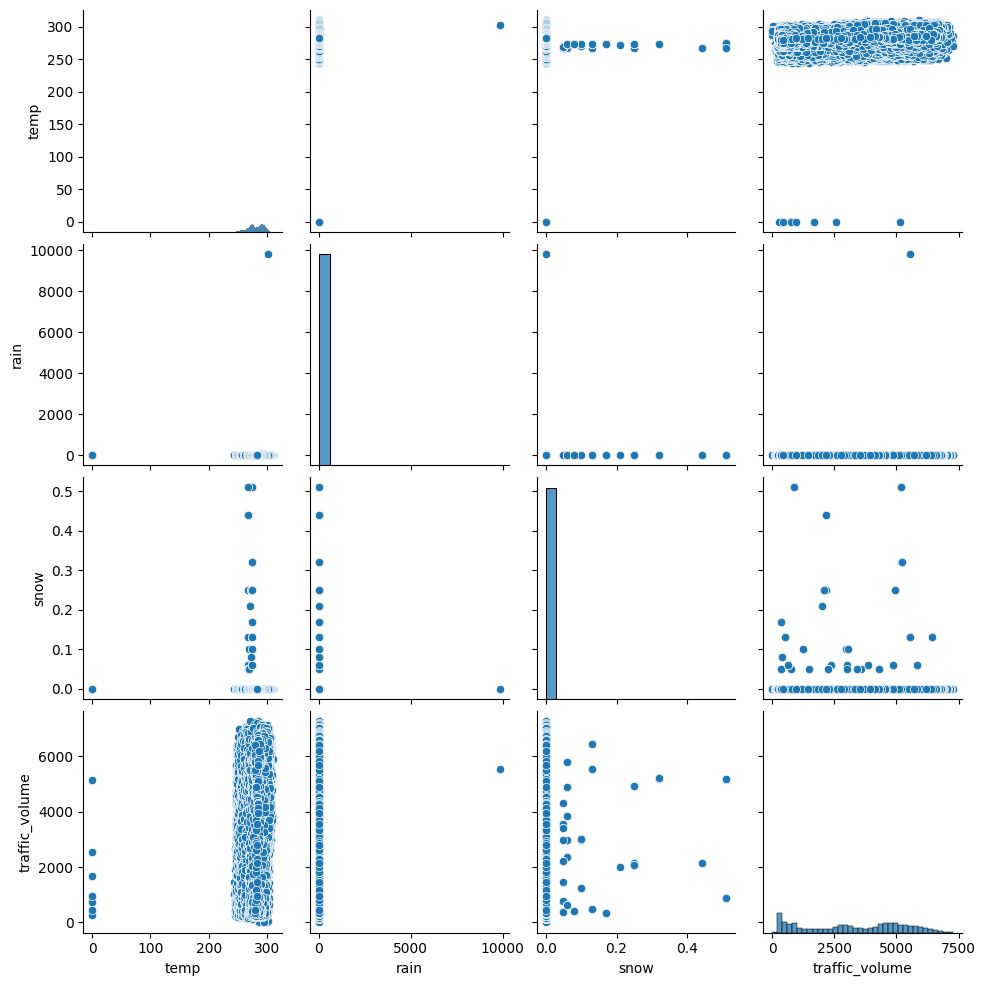

In [19]:
sns.pairplot(data)

In [24]:
cor = data.select_dtypes(include=['float64', 'int64']).corr()
print(cor)


                    temp      rain      snow  traffic_volume
temp            1.000000  0.009070 -0.019758        0.130034
rain            0.009070  1.000000 -0.000090        0.004714
snow           -0.019758 -0.000090  1.000000        0.000735
traffic_volume  0.130034  0.004714  0.000735        1.000000


<Axes: >

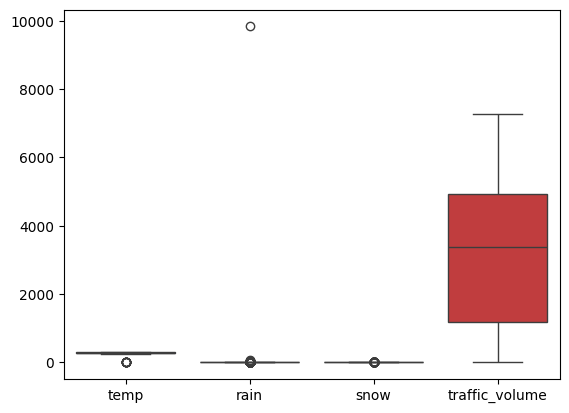

In [25]:
sns.boxplot(data)

In [26]:
data[["day","month","year"]]=data["date"].str.split("-",expand=True)


In [27]:
data[["hours","minutes","seconds"]]=data["Time"].str.split(":",expand=True)

In [28]:
data.drop(columns=['date','Time'],axis=1,inplace = True)

In [29]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [37]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)

In [38]:
names = x.columns

In [39]:
from sklearn.preprocessing import scale

In [44]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

x['holiday'] = encoder.fit_transform(x['holiday'])
x['weather'] = encoder.fit_transform(x['weather'])


In [45]:
x = scale(x)

In [46]:
x=pd.DataFrame(x,columns=names)

In [47]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.031687,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.031687,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.031687,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.031687,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.031687,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm

import xgboost

lin_reg = linear_model. LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble. RandomForestRegressor()

svr = svm. SVR()
XGB = xgboost.XGBRegressor()

In [51]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [54]:
from sklearn import metrics

print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.5015159097319355
1.0
0.9745600395183897
-12.206690423423506
0.8463600277900696


In [56]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.365817964773331
0.6936219475397309
0.8007588272704071
-11.990577978126485
0.8047676682472229


In [57]:
#RMSE values

MSE = metrics.mean_squared_error(p3,y_test)

np.sqrt(MSE)

np.float64(802.3865814830089)

In [59]:
import pickle

pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(encoder,open("encoder.pkl",'wb'))

In [61]:
import pickle

# Save the trained model
pickle.dump(Rand, open('model.pkl', 'wb'))

# Save the label encoder you used
pickle.dump(encoder, open('encoder.pkl', 'wb'))

# (Optional) Create a simple HTML file to zip together
with open('index.html', 'w') as f:
    f.write('<html><body><h1>Hello from Colab!</h1></body></html>')


In [62]:
!zip -r project_files.zip model.pkl encoder.pkl index.html
from google.colab import files
files.download('project_files.zip')


  adding: model.pkl (deflated 82%)
  adding: encoder.pkl (deflated 19%)
  adding: index.html (deflated 12%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>